

# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

I've selected the 'TMDB movie data' for this analysis. So I'll first look at a snapshot of the data to figure out what the data is all about.

In [295]:
# Importing packages necessary for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Reading the data and looking at the snapshot of top 2 rows
pd.read_csv("tmdb-movies.csv",nrows=2)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


<br />
So,The dataset contains information on various movies released over the years. The metrics can be broadly divided into two categories:

     
| **Basic movie description**                           |**Success parameters**                          |               
| :- || :- |
| Title                                                 | Popularity                                     |
| Budget                                                | Revenue                                        |
| Cast                                                  | Vote average                                   |

Given such a layout, we would naturally be interested to explore the reasons behind the success or failure of the movies. 
So, we would be using any one of the success parameters as *indepedent variables*, based on the question we're trying to answer, and the movie descriptors as *dependent variables*.

The analysis to be carried out can be divided into two parts:

**Basic exploration**:<br/>
In this step, we would mostly look into the summary statistics for the relevant metrics, e.g.:
> - What is the average budget spent on a movie? 
> - What is the average revenue from a movie?
> - Which actor has been casted the most?
> - Which genre has the highest number of movies?
> - Which director has the highest number of films?
> - What is the average runtime of the movies?
> - Which genre is the most popular on an average?
> - Which genre has the maximum budget on an average?
> - Which genre produces maximum revenue on an average?

As can be seen, these questions revolve around summaries of various metrics. After the basic exploration is completed, we would delve deeper, and try to analyze the independent variables mentioned above based on the dependent ones.

**Questions to be answered**:<br/>
> - How the popularity of movies in general has changed over the years? Is the trend similar across the top genres?
> - How the budget of movies in general has changed over the years? Is the trend similar across the top genres?
> - How the number of movies released in a year has changed over the years?
> - Is there any association between ratings and revenue?
> - What are the characteristics of the successful movies (Note that, success can be defined in two ways, revenue and ratings. Not all critically acclaimed highly rated movies generate high revenues.)
> - Based on keywords, how the movie preferences have changed over the years?




<a id='wrangling'></a>
## Data Wrangling

In this step, I'll look into the general properties of the data and decide on the next steps as in cleaning (if needed), rearranging (if needed) to make the data ready for analysis.


**The shape of the data:**

In [296]:
#Loading the full dataset
data=pd.read_csv("tmdb-movies.csv")

#Looking at the shape of the data
print("The dataset has {} records, for {} variables.".format(data.shape[0],data.shape[1]))



The dataset has 10866 records, for 21 variables.


**The content of the data:**

In [297]:
#Checking the variables present in the data

print("The variables present in the data: ")
for i in data.columns:
    print(i)

The variables present in the data: 
id
imdb_id
popularity
budget
revenue
original_title
cast
homepage
director
tagline
keywords
overview
runtime
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj
revenue_adj


The variables like *homepage*, *tagline*, *overview* would not be of any use in our analysis. Since *release_year* is present in the data, we would not need *release_date*. We are interested in the actual budget and revenue, so we can drop the adjusted ones, *budget_adj*, *revenue_adj*. Also, there are two kinds of "id" present in the data. For our purpose one would be enough.

**Checking for duplication:**


In [298]:
print("The dataset contains {} duplicated records.".format(data.duplicated().sum()) if data.duplicated().sum()>1 else "The dataset contains {} duplicated record.".format(data.duplicated().sum()))

The dataset contains 1 duplicated record.


**Checking for null values:**

In [299]:
#Finding out which columns have null values
na=data.isna().sum()

#Displaying only the null containing columns names along with the count of null values
print(na[na>0])

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64


**Note:**
9 columns in total contains null values. Among them homepage has the highest number of null values (~73%), followed by tagline, keylines and production companies. We'd see how we can resolve this problem in the cleaning section.

**Checking for errant data:** <br/>
<br/>
The presence of any errant data should be reflected in the summary statistics. So we'll have a look at that first. 

In [300]:
#Computing summary measures for each numerical variable
#Summary statistics for "id" doesn't make sense so removing that
data.iloc[:,1:].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Both *budget* and *revenue* show unusually large values of variance. We need to take a deeper look into these variables to find out what's happening.

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5,1,'Boxplot showing distribution of budget')

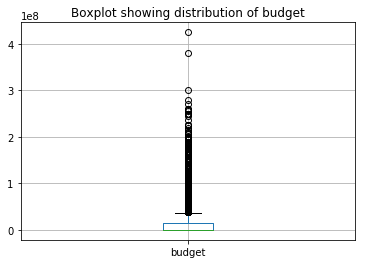

In [301]:
#Plotting boxplot for budget
print(data[["budget"]].boxplot())
plt.title("Boxplot showing distribution of budget")

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5,1,'Boxplot showing distribution of revenue')

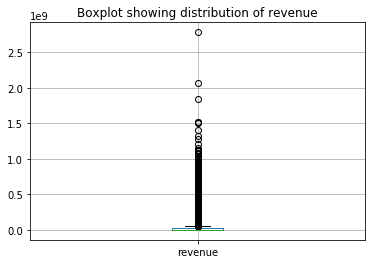

In [302]:
#Plotting boxplot for revenue
print(data[["revenue"]].boxplot())
plt.title("Boxplot showing distribution of revenue")

The boxplots show that both the metrics are clustered around 0, which is quite unreasonable. The only reasons for budget/revenue to be 0 could be:
- The values were not recorded properly (and hence should be treated as missing values)
- The movies were not released at all.<br/>

While checking for null values, we saw that the *release_year* column has no null value. So we'll check for any possible non-null errant value there.

In [303]:
#Checking the year of release for records having 0 budget or revenue
print(data[data["revenue"]==0]["release_year"].unique())
print(data[data["budget"]==0]["release_year"].unique())

[2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997
 2013 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981
 1996 2000 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971
 1990 1961 1960 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]
[2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997
 2013 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981
 1996 2000 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971
 1990 1961 1960 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]


This confirms all the movies were released. So, we rule out the second possibility and treat the 0s as missing values. <br/>

Our data wrangling process is complete. Based on our exploration, we would execute the following cleaning steps:
- Remove the duplicated records 
- Omit the irrelevant fields
- Treat missing values and zero values where needed




### Data Cleaning

As discussed in the previous section, we would clean the data in this phase.

<br/>
**Removing the duplicated record**

In [304]:
#Removing duplicates
data.drop_duplicates(inplace=True)

#Checking if the duplicate was properly removed
print("After cleaning the dataset contains {} duplicated records.".format(data.duplicated().sum()) if data.duplicated().sum()>1 else "After cleaning, the dataset contains {} duplicated record.".format(data.duplicated().sum()))

After cleaning, the dataset contains 0 duplicated record.


**Omitting irrelevant fields**

In [305]:
# We would drop the homepage,tagline,overview,release_date,buget_adj,revenue_adj. 
#Since imdb_id has 10 values missing, as seen before, we can drop that and use id instead if the id is unique.

#Checking if the id is duplicated
print("The id column contains duplicates and hence can't be used as an identification key." if data[["id"]].duplicated().sum()>0 else "The id column doesn't contain duplicates and can be used as an identification key.")

#Dropping the columns
data.drop(["imdb_id","homepage","tagline","overview","release_date","budget_adj","revenue_adj"], axis=1, inplace=True)

#Checking if the columns were properly dropped
print("The remaining columns are: ")
for i in data.columns:
    print(i)


The id column doesn't contain duplicates and can be used as an identification key.
The remaining columns are: 
id
popularity
budget
revenue
original_title
cast
director
keywords
runtime
genres
production_companies
vote_count
vote_average
release_year


**Treating the null values**

After dropping the variables we now have null values in only *cast*,*director*,*genres*,*keywords* and *production_companies* columns. In the first three cases, the number of null values are small and hence can be removed without implications on the analysis.
However, the *production_companies* and *keywords* contain a lot of null values and dropping them can result into losing considerable amount of data. So we'll keep them as they are.

In [306]:
#Dropping the null values
data.dropna(subset=["cast","director","genres"], inplace=True)  

#Checking the amount of null values after dropping
na=data.isna().sum()
print(na[na>0])

keywords                1425
production_companies     959
dtype: int64


As expected, the null values have only remained in *keywords* and *production_companies* column.

**Treating the zero values**<br/>
We have seen in both *budget* and *revenue* columns there are outrageous amount of zeros present, which are more likely to be missing data. <br/>
So, we'll first check the proportion of 0s in both columns.

In [307]:
#Calculating proportion of zeroes
print("{}% of budget values are zeroes.".format(round(len(data.query('budget==0'))/len(data["budget"])*100),2))
print("{}% of budget values are zeroes.".format(round(len(data.query('revenue==0'))/len(data["revenue"])*100),2))

52% of budget values are zeroes.
55% of budget values are zeroes.


With more than 50% values missing, imputation is not a preferable option. Rather, we'll treat these as missing values so that it doesn't affect our analysis.

In [308]:
#Replacing the zeroes with null values
data["budget"].replace(0, np.nan,inplace=True)
data["revenue"].replace(0, np.nan,inplace=True)

After replacing the zeroes with null values we'll check how the distributions of the variables have changed.

In [309]:

data[["budget","revenue"]].describe()

,budget,revenue
count,5.153000e+03,4.843000e+03
mean,3.082824e+07,8.933981e+07
std,3.893199e+07,1.621546e+08
min,1.000000e+00,2.000000e+00
25%,6.000000e+06,7.779664e+06
50%,1.750000e+07,3.191160e+07
75%,4.000000e+07,1.000000e+08
max,4.250000e+08,2.781506e+09


We see the distributions are not centered around 0 anymore. Though it has minimum values as low as 1 or 2, we can't make all of them missing since then we'll be left with almost no data.
<br/>
<br/>

The cleaning procedure is completed. And here is the final snapshot of the data.

In [310]:
#Snapshot of the data
data.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015


In [311]:
#Properties of the cleaned data
print(data.info())
print("After cleaning, the dataset has {} records, for {} variables.".format(data.shape[0],data.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 1006.0+ KB
None
After cleaning, the dataset has 10731 records, for 14 variables.


The dataset still have some missing values, but that we've already agreed upon. So next we'll move on to the exploratory data analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Basic exploration

As discussed before, we'd first calculate the summary statistics for each of the variable.



In [312]:
#Summary statistics for relevant numerical variables
summary=data.iloc[:,1:].describe()
print(summary)

         popularity        budget       revenue       runtime    vote_count  \
count  10731.000000  5.153000e+03  4.843000e+03  10731.000000  10731.000000   
mean       0.652615  3.082824e+07  8.933981e+07    102.468829    219.812972   
std        1.004804  3.893199e+07  1.621546e+08     30.493873    578.815324   
min        0.000188  1.000000e+00  2.000000e+00      0.000000     10.000000   
25%        0.210765  6.000000e+06  7.779664e+06     90.000000     17.000000   
50%        0.387081  1.750000e+07  3.191160e+07     99.000000     39.000000   
75%        0.720889  4.000000e+07  1.000000e+08    112.000000    148.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year  
count  10731.000000  10731.000000  
mean       5.964710   2001.259622  
std        0.930283     12.820151  
min        1.500000   1960.000000  
25%        5.400000   1995.000000  
50%        6.000000   2006.000000  
75%        6.600000   2011.000000  


Now we'll answer the questions posed above one by one.

**What is the average budget spent on a movie?**

In [313]:
print("The average budget spent on a movie is {}.".format(round(summary.loc["mean","budget"])))

The average budget spent on a movie is 30828241.0.


**What is the average revenue from a movie?**

In [314]:
print("The average revenue from a movie is {}.".format(round(summary.loc["mean","revenue"])))


The average revenue from a movie is 89339813.0.


**Which actor has been casted the most?**


In [315]:
cast=pd.Series(data["cast"].str.cat(sep='|').split('|')).value_counts().sort_values(ascending=False)[[0]]
print("{} has been cast the most, {} times to be specific.".format(cast.keys()[0],cast.values[0]))

Robert De Niro has been cast the most, 72 times to be specific.


**Which genre has the highest number of movies?**

In [316]:
genre=pd.Series(data["genres"].str.cat(sep='|').split('|')).value_counts().sort_values(ascending=False)[[0]]
print("Movies mostly belong to {} genre, {} {} movies were released.".format(genre.keys()[0].lower(),genre.values[0],genre.keys()[0].lower()))

Movies mostly belong to drama genre, 4746 drama movies were released.


**Which director has the highest number of films?**

In [317]:
director=data["director"].value_counts().sort_values(ascending=False)[[0]]
print("{} has directed highest number of movies, {}.".format(director.keys()[0],director.values[0]))

Woody Allen has directed highest number of movies, 45.


**What is the average runtime of the movies?**

In [318]:
print("The average runtime of a movie is {} minutes.".format(int(summary.loc["mean","runtime"])))

The average runtime of a movie is 102 minutes.


**Which genre is the most popular on an average?**

In [319]:
data_genre = data[["genres"]].applymap(lambda x: x.split('|'))
data_1=data.copy()
data_1["genres"]=data_genre
data_2 = pd.DataFrame(data_1['genres'].values.tolist(),index=data_1['popularity']).stack().reset_index(level=1, drop=True).reset_index(name='genre')
m=data_2.groupby("genre").mean()
m1=m[m["popularity"]==max(m["popularity"])]
print("{} genre is most popular, with an average popularity of {}.".format(m1.index[0],m1.values[0]))


Adventure genre is most popular, with an average popularity of [1.15847976].


**Which genre has the maximum budget on an average?**

In [320]:
data_2 = pd.DataFrame(data_1['genres'].values.tolist(),index=data_1['budget']).stack().reset_index(level=1, drop=True).reset_index(name='genre')
m=data_2.groupby("genre").mean()
m1=m[m["budget"]==max(m["budget"])]
print("{} genre on an average has the highest average budget of {}.".format(m1.index[0],m1.values[0]))


Animation genre on an average has the highest average budget of [62981467.48249027].


**Which genre produces maximum revenue on an average?**

In [321]:
data_2 = pd.DataFrame(data_1['genres'].values.tolist(),index=data_1['revenue']).stack().reset_index(level=1, drop=True).reset_index(name='genre')
m=data_2.groupby("genre").mean()
m1=m[m["revenue"]==max(m["revenue"])]
print("{} genre on an average produces the highest average revenue of {}.".format(m1.index[0],m1.values[0]))


Animation genre on an average produces the highest average revenue of [2.21957753e+08].


Next, we'll consider the deeper questions.


** How the popularity of movies in general has changed over the years? Is the trend similar across the top genres?**

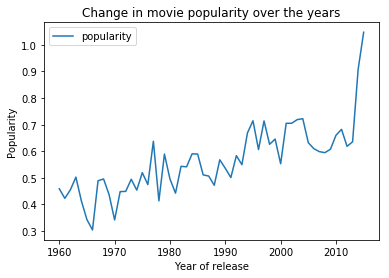

In [322]:
#Plotting general popularity trend across the years
pop_year=data.groupby("release_year").mean()["popularity"]
plt.plot(pop_year,label="popularity")
plt.xlabel("Year of release")
plt.ylabel("Popularity")
plt.title("Change in movie popularity over the years")
plt.legend()


Now, we'll see the trend for top 5 genres which had most number of movies in these years.

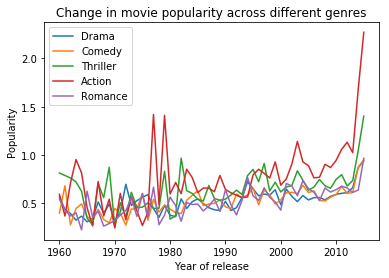

In [323]:
data_2 = pd.DataFrame(data_1['genres'].values.tolist(),index=data_1['id']).stack().reset_index(level=1, drop=True).reset_index(name='genre')
data_3=pd.merge(data_2, data, how='left', on=['id'])[["genre","release_year","popularity"]]

#Selecting top 5 genres
g=data_3["genre"].value_counts()[:5]

#Plotting popularity for 5 genres
for i in g.keys():
    plt.plot(data_3[data_3['genre']==i].groupby(['release_year']).mean(),label=i)
    plt.xlabel("Year of release")
plt.ylabel("Popularity")
plt.title("Change in movie popularity across different genres")
plt.legend()  
plt.show()


The plots show that the genrewise trends are same as the overall trend. However, the *action* genre was extremely popular during 80s.

Now we'll do a similar analysis for movie budgets.

**How the budget of movies in general has changed over the years? Is the trend similar across the top genres?**

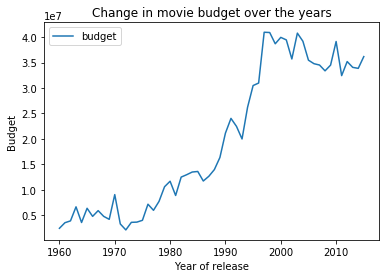

In [324]:
#Plotting general budget trend across the years
pop_year=data.groupby("release_year").mean()["budget"]
plt.plot(pop_year,label="budget")
plt.xlabel("Year of release")
plt.ylabel("Budget")
plt.title("Change in movie budget over the years")
plt.legend()


Now, we'll see the trend for top 5 genres again.

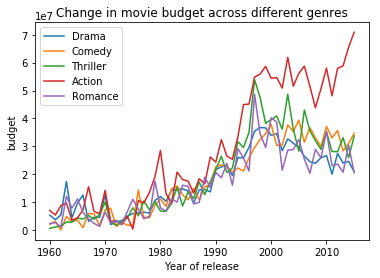

In [325]:
data_2 = pd.DataFrame(data_1['genres'].values.tolist(),index=data_1['id']).stack().reset_index(level=1, drop=True).reset_index(name='genre')
data_3=pd.merge(data_2, data, how='left', on=['id'])[["genre","release_year","budget"]]

#Selecting top 5 genres
g=data_3["genre"].value_counts()[:5]

#Plotting budget for 5 genres
for i in g.keys():
    plt.plot(data_3[data_3['genre']==i].groupby(['release_year']).mean(),label=i)
    plt.xlabel("Year of release")
plt.ylabel("budget")
plt.title("Change in movie budget across different genres")
plt.legend()  
plt.show()


The plots show that movie budget has increased consistently over the years. For *action* movies, the increase is steeper from 2000.

**How the number of movies released in a year has changed over the years?**

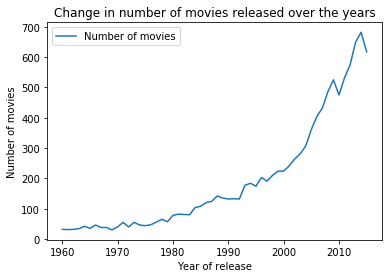

In [326]:
#Plotting trend for number of movies released across the years
pop_year=data.groupby("release_year")["id"].count()
plt.plot(pop_year,label="Number of movies")
plt.xlabel("Year of release")
plt.ylabel("Number of movies")
plt.title("Change in number of movies released over the years")
plt.legend()



** Is there any association between ratings and revenue?** <br/>
We're considering the *vote_average* as rating here.

Text(0.5,0,'Average vote')

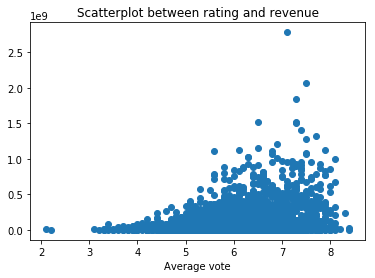

In [327]:
#Plotting a scatterplot of ratings and revenue first
plt.scatter(x=data["vote_average"],y=data["revenue"])
plt.title("Scatterplot between rating and revenue")
plt.xlabel("Average vote")

A moderate positive linear association seems to be present. Let's check the correlation.

In [328]:
#Calculating correlation coefficient
data.loc[:,["vote_average","revenue"]].corr(method='pearson')

,vote_average,revenue
vote_average,1.000000,0.207157
revenue,0.207157,1.000000


As expected, a weak positive linear correlation is found.

**What are the characteristics of the successful movies?** <br/>(Note that, success can be defined in two ways, revenue and ratings. Not all critically acclaimed highly rated movies generate high revenues.)

To answer this question, we would first divide the data according to both level of popularity and revenue, based on quartiles. Then we'll look into the differences among movies falling into highest quartile and the other quartile in terms of different characteristics. 

In [329]:
data["Revenue_level"]=pd.qcut(data["revenue"], 4, labels=["Low", "Medium", "High","Very high"])
data["Rating_level"]=pd.qcut(data["vote_average"], 4, labels=["Low", "Medium", "High","Very high"])

Revenue_level
Low          9.724259e+06
Medium       2.015680e+07
High         3.085682e+07
Very high    7.212286e+07
Name: budget, dtype: float64


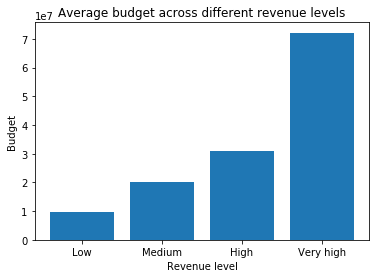

In [330]:
#Budget level across different revenue quartiles
plt.bar(np.arange(4),data["budget"].groupby(data["Revenue_level"]).mean())
label=["Low", "Medium", "High","Very high"]
plt.xticks(np.arange(4),label)
plt.title("Average budget across different revenue levels")
plt.xlabel("Revenue level")
plt.ylabel("Budget")
print(data["budget"].groupby(data["Revenue_level"]).mean())

This clearly shows that movies with more budget tend to generate more revenue.

In [331]:

print("The average budget of movies having very high revenue is {}.".format(round(data[data["Revenue_level"]=="Very high"]["budget"].mean(),2)))

print("The average of revenue of movies falling in very high bucket is {}.".format(round(data[data["Revenue_level"]=="Very high"]["revenue"].mean(),2)))

The average budget of movies having very high revenue is 72122857.12.
The average of revenue of movies falling in very high bucket is 278366815.95.


Text(0,0.5,'Runtime')

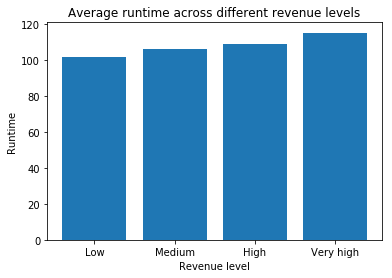

In [332]:
#Runtime level across different revenue quartiles
plt.bar(np.arange(4),data["runtime"].groupby(data["Revenue_level"]).mean())
label=["Low", "Medium", "High","Very high"]
plt.xticks(np.arange(4),label)
plt.title("Average runtime across different revenue levels")
plt.xlabel("Revenue level")
plt.ylabel("Runtime")

Though with increasing runtime revenue tends to increase, there is not much difference in terms of runtime at different levels of revenue.

In [333]:
print("The average runtime of movies having very high revenue is {}.".format(round(data[data["Revenue_level"]=="Very high"]["runtime"].mean(),2)))


The average runtime of movies having very high revenue is 115.37.


In [334]:
#Checking the top 5 production companies at each revenue level
for i in data["Revenue_level"].unique():
    data_1=data[data["Revenue_level"]==i]
    print(i)
    print(data_1["production_companies"].value_counts().sort_values(ascending=False)[:5])

Very high
Paramount Pictures                              24
Universal Pictures                              15
DreamWorks Animation                            13
Walt Disney Pictures|Pixar Animation Studios    13
Walt Disney Pictures                            10
Name: production_companies, dtype: int64
High
Paramount Pictures    41
Warner Bros.          19
Universal Pictures    19
Columbia Pictures     19
New Line Cinema       16
Name: production_companies, dtype: int64
Medium
Paramount Pictures    38
Universal Pictures    34
Warner Bros.          19
Columbia Pictures     18
New Line Cinema       16
Name: production_companies, dtype: int64
nan
Series([], Name: production_companies, dtype: int64)
Low
Metro-Goldwyn-Mayer (MGM)    13
Universal Pictures           10
New Line Cinema               8
TriStar Pictures              5
Lions Gate Films              5
Name: production_companies, dtype: int64


We find almost the same set of companies in each revenue bucket, so revenue doesn't depend much on production companies.

In [335]:
#Checking the top 5 casts at each revenue level
data_cast = data[["cast"]].applymap(lambda x: x.split('|'))
data_2=data.copy()
data_2["cast"]=data_cast
data_3 = pd.DataFrame(data_2['cast'].values.tolist(),index=data_2['id']).stack().reset_index(level=1, drop=True).reset_index(name='casts')
data_4=pd.merge(data_3, data, how='left', on=['id'])


for i in data_4["Revenue_level"].unique():
    data_1=data_4[data_4["Revenue_level"]==i]
    print(i)
    print(data_1["casts"].value_counts().sort_values(ascending=False)[:5])

Very high
Tom Cruise            26
Brad Pitt             25
Tom Hanks             23
Sylvester Stallone    22
Harrison Ford         20
Name: casts, dtype: int64
High
Robert De Niro    19
Bruce Willis      16
Nicolas Cage      14
Jason Statham     14
Alec Baldwin      14
Name: casts, dtype: int64
Medium
Dennis Quaid        16
Robert De Niro      14
Christian Slater    12
Nicolas Cage        11
Julianne Moore      11
Name: casts, dtype: int64
nan
Series([], Name: casts, dtype: int64)
Low
Morgan Freeman     11
Willem Dafoe        9
Woody Harrelson     9
Rosario Dawson      9
Mickey Rourke       9
Name: casts, dtype: int64


The results vary for each bucket, so we can assume that revenue depends on the casting to some extent.

In [336]:
#Checking the top 5 genres at each revenue level
data_2=data.copy()
data_2["genres"]=data_genre
data_3 = pd.DataFrame(data_2['genres'].values.tolist(),index=data_2['id']).stack().reset_index(level=1, drop=True).reset_index(name='genre')
data_4=pd.merge(data_3, data, how='left', on=['id'])


for i in data_4["Revenue_level"].unique():
    data_1=data_4[data_4["Revenue_level"]==i]
    print(i)
    print(data_1["genre"].value_counts().sort_values(ascending=False)[:5])

Very high
Action       450
Comedy       445
Drama        417
Adventure    387
Thriller     350
Name: genre, dtype: int64
High
Drama       551
Comedy      477
Thriller    385
Action      314
Crime       224
Name: genre, dtype: int64
Medium
Drama       618
Comedy      446
Thriller    367
Action      285
Romance     254
Name: genre, dtype: int64
nan
Series([], Name: genre, dtype: int64)
Low
Drama       685
Comedy      402
Thriller    320
Romance     222
Action      211
Name: genre, dtype: int64


Apart from adventure all the other genres appear in every bucket, so revenue not hugely depends on genre.

Now, we'll check for the same things for different rating buckets.

Text(0,0.5,'Budget')

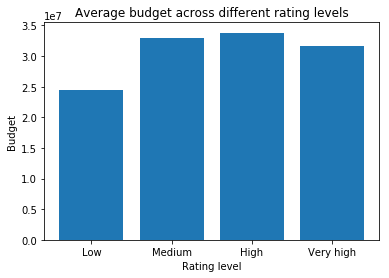

In [337]:
#Budget level across different rating quartiles
plt.bar(np.arange(4),data["budget"].groupby(data["Rating_level"]).mean())
label=["Low", "Medium", "High","Very high"]
plt.xticks(np.arange(4),label)
plt.title("Average budget across different rating levels")
plt.xlabel("Rating level")
plt.ylabel("Budget")

There is no clear trend as seen in case of revenue. So unlike revenue, ratings don't depend on budget.

Text(0,0.5,'Runtime')

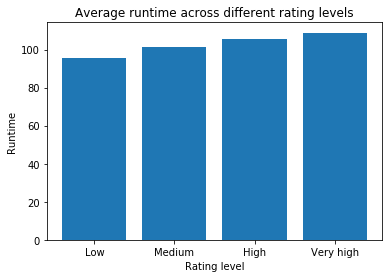

In [338]:
#Runtime level across different rating quartiles
plt.bar(np.arange(4),data["runtime"].groupby(data["Rating_level"]).mean())
label=["Low", "Medium", "High","Very high"]
plt.xticks(np.arange(4),label)
plt.title("Average runtime across different rating levels")
plt.xlabel("Rating level")
plt.ylabel("Runtime")

Again, runtime is almost similar across the buckets with a slightly increasing trend.

In [339]:
#Checking the top 5 production companies at each rating level
for i in data["Rating_level"].unique():
    data_1=data[data["Rating_level"]==i]
    print(i)
    print(data_1["production_companies"].value_counts().sort_values(ascending=False)[:5])

High
Paramount Pictures                        54
Universal Pictures                        33
Walt Disney Pictures                      21
New Line Cinema                           21
Twentieth Century Fox Film Corporation    19
Name: production_companies, dtype: int64
Very high
Paramount Pictures         39
Universal Pictures         28
Warner Bros.               23
Columbia Pictures          18
Pixar Animation Studios    17
Name: production_companies, dtype: int64
Medium
Universal Pictures     43
Paramount Pictures     40
Columbia Pictures      24
Touchstone Pictures    20
Warner Bros.           18
Name: production_companies, dtype: int64
Low
Universal Pictures           29
Walt Disney Pictures         27
Warner Bros.                 25
Paramount Pictures           23
Metro-Goldwyn-Mayer (MGM)    23
Name: production_companies, dtype: int64


We find almost the same set of companies in each rating bucket, so rating doesn't depend much on production companies either.

In [340]:
#Checking the top 5 directors at each rating level
for i in data["Rating_level"].unique():
    data_1=data[data["Rating_level"]==i]
    print(i)
    print(data_1["director"].value_counts().sort_values(ascending=False)[:5])

High
Woody Allen          17
Steven Soderbergh    13
Ron Howard           12
Tony Scott           10
Richard Donner       10
Name: director, dtype: int64
Very high
Martin Scorsese     21
Steven Spielberg    18
Clint Eastwood      18
Woody Allen         17
Wes Anderson        11
Name: director, dtype: int64
Medium
Woody Allen       10
Stephen Herek      9
Walter Hill        8
Gerald Thomas      7
Garry Marshall     7
Name: director, dtype: int64
Low
Uwe Boll            13
Stuart Gillard       9
Peter Hyams          8
Brian Levant         7
Robert Rodriguez     7
Name: director, dtype: int64


In [341]:
#Checking the top 5 casts at each rating level
data_cast = data[["cast"]].applymap(lambda x: x.split('|'))
data_2=data.copy()
data_2["cast"]=data_cast
data_3 = pd.DataFrame(data_2['cast'].values.tolist(),index=data_2['id']).stack().reset_index(level=1, drop=True).reset_index(name='casts')
data_4=pd.merge(data_3, data, how='left', on=['id'])


for i in data_4["Rating_level"].unique():
    data_1=data_4[data_4["Rating_level"]==i]
    print(i)
    print
    print(data_1["casts"].value_counts().sort_values(ascending=False)[:5])
    print()

High
Michael Caine     19
Nicole Kidman     19
Robert De Niro    19
Susan Sarandon    19
Mel Gibson        18
Name: casts, dtype: int64

Very high
Robert De Niro       26
Tom Hanks            22
Brad Pitt            22
Samuel L. Jackson    21
Morgan Freeman       18
Name: casts, dtype: int64

Medium
Nicolas Cage         21
Alec Baldwin         21
Samuel L. Jackson    20
Bruce Willis         19
John Goodman         19
Name: casts, dtype: int64

Low
Jean-Claude Van Damme    31
Steven Seagal            29
Dolph Lundgren           22
Danny Trejo              21
Bruce Willis             18
Name: casts, dtype: int64



The results vary for each bucket, so we can assume that revenue depends on the casting and director to some extent.

In [342]:
#Checking the top 5 genres at each rating level
data_2=data.copy()
data_2["genres"]=data_genre
data_3 = pd.DataFrame(data_2['genres'].values.tolist(),index=data_2['id']).stack().reset_index(level=1, drop=True).reset_index(name='genre')
data_4=pd.merge(data_3, data, how='left', on=['id'])


for i in data_4["Rating_level"].unique():
    data_1=data_4[data_4["Rating_level"]==i]
    print(i)
    print(data_1["genre"].value_counts().sort_values(ascending=False)[:5])

High
Drama       1382
Comedy      1002
Thriller     719
Action       595
Romance      534
Name: genre, dtype: int64
Very high
Drama       1355
Comedy       675
Thriller     414
Action       392
Romance      352
Name: genre, dtype: int64
Medium
Drama       1173
Comedy      1026
Thriller     787
Action       623
Romance      465
Name: genre, dtype: int64
Low
Comedy      1072
Thriller     982
Horror       856
Drama        836
Action       766
Name: genre, dtype: int64


We see same set of genres in each bucket, so it's safe to assume ratings don't depend on the genre of the movie.

**Based on keywords, how the movie preferences have changed over the years?**

In [343]:
r=pd.Series(data["release_year"]).sort_values(ascending=False)
for i in r.unique():
    data_1=data[data["release_year"]==i]
    print(i)
    print(data_1["keywords"].value_counts().sort_values(ascending=False)[[0]])

2015
woman director    13
Name: keywords, dtype: int64
2014
woman director    14
Name: keywords, dtype: int64
2013
woman director    34
Name: keywords, dtype: int64
2012
woman director    16
Name: keywords, dtype: int64
2011
woman director    8
Name: keywords, dtype: int64
2010
duringcreditsstinger    7
Name: keywords, dtype: int64
2009
independent film    10
Name: keywords, dtype: int64
2008
independent film    8
Name: keywords, dtype: int64
2007
independent film    8
Name: keywords, dtype: int64
2006
independent film    5
Name: keywords, dtype: int64
2005
independent film    6
Name: keywords, dtype: int64
2004
holiday    2
Name: keywords, dtype: int64
2003
independent film    3
Name: keywords, dtype: int64
2002
aftercreditsstinger|duringcreditsstinger    2
Name: keywords, dtype: int64
2001
independent film    3
Name: keywords, dtype: int64
2000
independent film    4
Name: keywords, dtype: int64
1999
sport    2
Name: keywords, dtype: int64
1998
independent film    2
Name: keywords, dt

In the early years we don't see any prominent trend in term of keywords. However, a trend of *independent films* can be seen starting in 2000, 2010 onwards a new trend of *women director* begins.

** Question: The basic exploration shows *animation* to be a high revenue generating genre. Then why doesn't it fall in the 'Very high' bucket of revenue?**

In [344]:
data_genre = data[["genres"]].applymap(lambda x: x.split('|'))
data_1=data.copy()
data_1["genres"]=data_genre
data_2 = pd.DataFrame(data_1['genres'].values.tolist(),index=data_1['id']).stack().reset_index(level=1, drop=True).reset_index(name='genre')
data_3=pd.merge(data_2, data, how='left', on=['id'])[["genre","release_year","budget"]]

#Selecting top 5 genres
data_3["genre"].value_counts()


Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genre, dtype: int64

The reason might be the very low number of animation movies getting released compared to other genres.

<a id='conclusions'></a>
## Conclusions

#### Based on the above investigation we've made the following observations:
- The number of movies getting released has increased over the years, in 60s the number was even below 100, whereas after 2010, that number stands close to 700
- The budget of movies have also increased, specially during 80s to 2000
- The most succesful movies (in terms of having an average revenue around 278 million) have mostly the following characteristics:
> * They have a high budget, around 72 million on an average.
> * They also have a slighty higher average runtime of 115 minutes, when compared to other movies.
> * Most of the high revenue generating movies have *Robert De Niro*, *Brad Pitt*, *Tom Hanks* in their cast.
> * The *adventure* genre generally yields higher revenue.
- The movies having high ratings also show a similar cast list and they are mostly directed by one of the following directors, *Martin Scorsese*, *Steven Spielberg*, *Clint Eastwood*, *Woody Allen*.


<a id='eda'></a>
## Limitations


- No units are mentioned for the budget or revenue fields. If they have varying units, then this analysis might not hold.
- We also had a lot of ,issing values which we treated as null values. This might affect the quality of the analysis.
- We have no idea if the popularity and vote counts are coming from same medium, if they don't, then they are not comparable at all.